In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as m
import seaborn as sns
%matplotlib inline

In [22]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:>

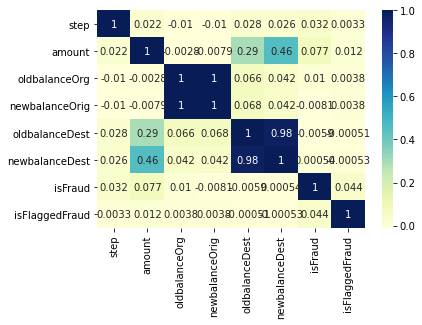

In [3]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

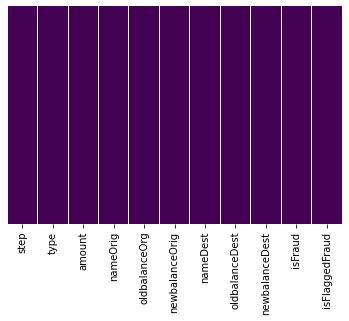

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
from sklearn.preprocessing import LabelEncoder

le_columns = ['type', 'nameDest','nameOrig' ]
le = LabelEncoder()

for col in le_columns:
    df[col] = le.fit_transform(df[col])

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop(["isFraud"],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  
print(vif_data)

          feature         VIF
0            step    2.781564
1            type    4.448977
2          amount    4.081645
3        nameOrig    2.762160
4   oldbalanceOrg  490.779205
5  newbalanceOrig  495.739967
6        nameDest    3.300455
7  oldbalanceDest   72.347029
8  newbalanceDest   83.797226
9  isFlaggedFraud    1.000582


In [25]:
from sklearn.model_selection import train_test_split
df.drop(['oldbalanceOrg','newbalanceOrig'],axis=1,inplace=True)
X=df.drop('isFraud',axis=1)
y=df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906359
           1       0.73      0.72      0.72      2427

    accuracy                           1.00   1908786
   macro avg       0.86      0.86      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786

